In [84]:
import warnings  
warnings.filterwarnings('ignore') 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('dataset.csv')

# Q1: Identify missing or incorrect data and apply preprocessing steps

In [85]:
df = pd.read_csv('dataset.csv')
print("Missing Data per Column:")
print(df.isnull().sum())

df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df.dropna(inplace=True) 

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    incorrect_values = df[df[column] < 0]
    if not incorrect_values.empty:
        print(f"Incorrect values in {column}:\n{incorrect_values}")
        df = df[df[column] >= 0]  

print("Cleaned Dataset:")
print(df.head())


Missing Data per Column:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Cleaned Dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
4       3450.0  female  
5       3650.0    male  


Explanation:
The code identifies and handles missing data by filling missing `bill_length_mm` values with its column mean and dropping rows with other null values. It then validates numerical columns (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`) by removing rows with negative values. This ensures the dataset is clean, consistent, and ready for analysis.
    

# Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [86]:
gentoo_avg_body_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body mass for Gentoo penguins: {gentoo_avg_body_mass} g")


Average body mass for Gentoo penguins: 5155.172413793103 g


# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

Adelie - bill_length_mm Skewness: 0.14785553055324596, Kurtosis: -0.1467776352724548
Adelie - bill_depth_mm Skewness: 0.30496283856083595, Kurtosis: -0.09234177872151461
Gentoo - bill_length_mm Skewness: 0.67326630982042, Kurtosis: 1.0836014591566618
Gentoo - bill_depth_mm Skewness: 0.3029278452361649, Kurtosis: -0.6328471059556411
Chinstrap - bill_length_mm Skewness: -0.06779138486245363, Kurtosis: -0.11474955589479752
Chinstrap - bill_depth_mm Skewness: 0.010697797755177615, Kurtosis: -0.8711614692760521


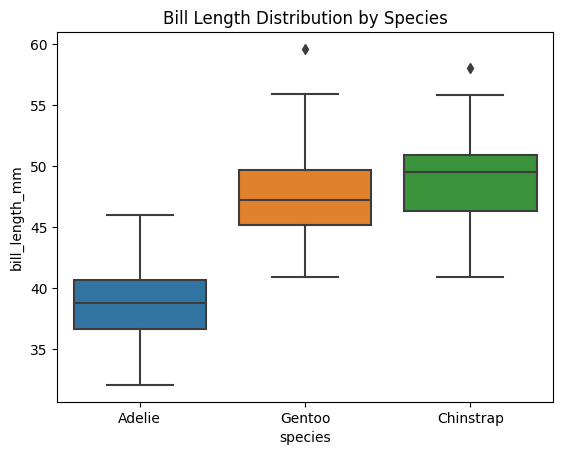

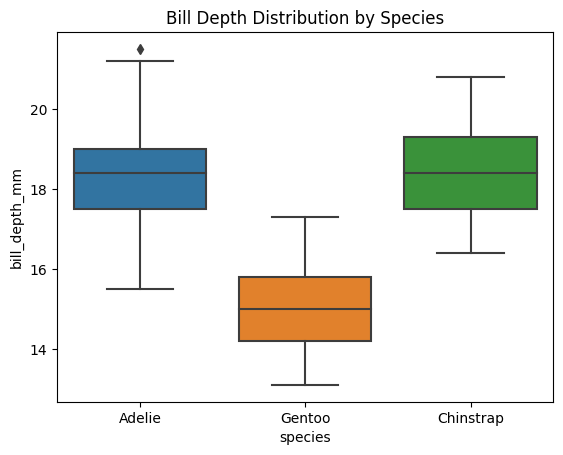

In [87]:
for species in df['species'].unique():
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        data = df[df['species'] == species][feature]
        print(f"{species} - {feature} Skewness: {skew(data)}, Kurtosis: {kurtosis(data)}")
        
sns.boxplot(data=df, x='species', y='bill_length_mm')
plt.title("Bill Length Distribution by Species")
plt.show()

sns.boxplot(data=df, x='species', y='bill_depth_mm')
plt.title("Bill Depth Distribution by Species")
plt.show()


Explanation:
The code calculates and prints the skewness and kurtosis of `bill_length_mm` and `bill_depth_mm` for each penguin species, providing insights into the data's distribution shape. It then uses boxplots to visually compare the distributions of `bill_length_mm` and `bill_depth_mm` across species, highlighting differences and potential outliers. This helps analyze how these features vary between species and assess their statistical characteristics.

# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

Outliers in bill_length_mm: 0
Outliers in bill_depth_mm: 0
Outliers in flipper_length_mm: 0
Outliers in body_mass_g: 3


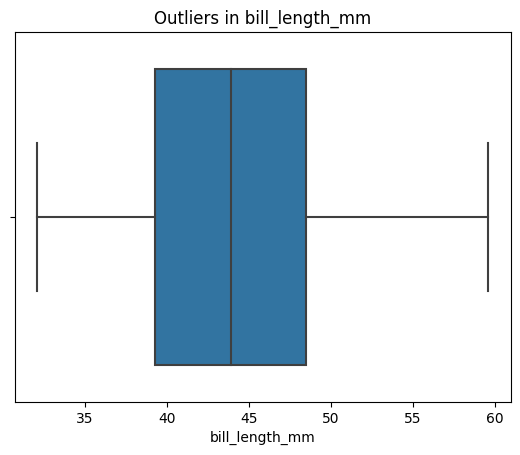

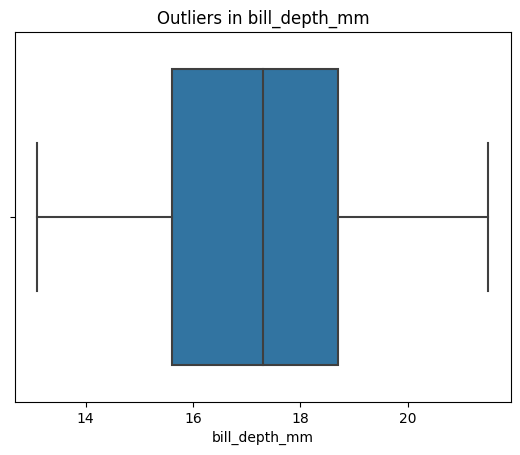

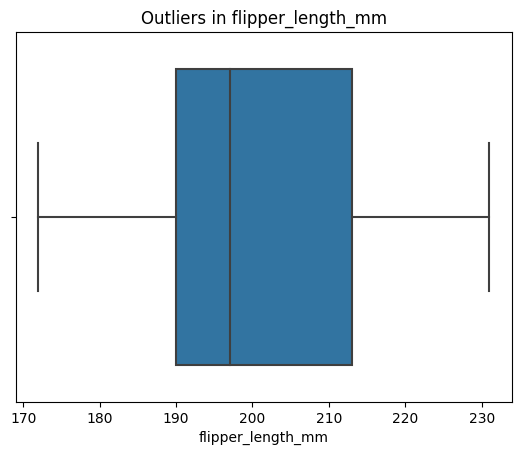

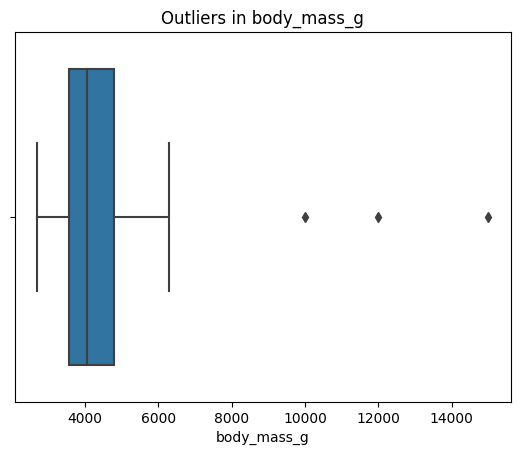

In [88]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = {}
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    outliers[col] = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers[col])}")

for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    sns.boxplot(df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


Explanation:
This code identifies outliers in the specified columns using the **IQR (Interquartile Range)** method, calculating thresholds beyond which values are considered outliers. It iterates through the columns `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`, storing the detected outliers for each feature and printing their counts. Boxplots are then generated for each column, visually highlighting the presence of outliers. This analysis helps in understanding the spread and identifying anomalies in the dataset.

# Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

Explained Variance Ratios: [0.61791452 0.19718627]


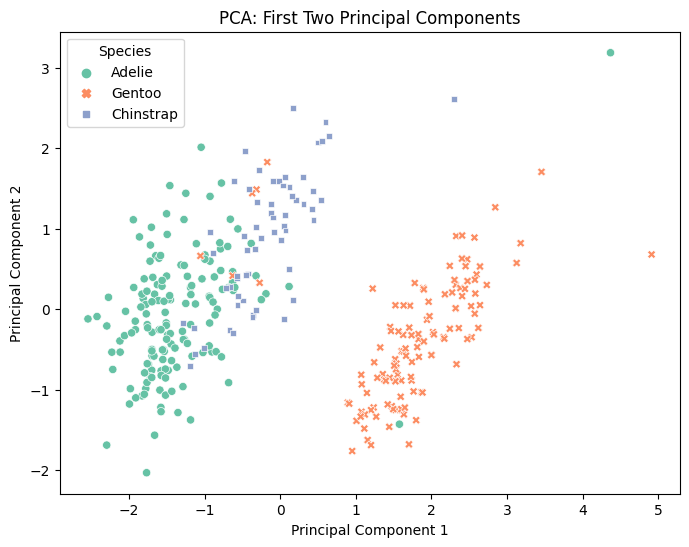

In [109]:

df = pd.read_csv("dataset.csv")

features = df.select_dtypes(include=["float64", "int64"]).columns
df_cleaned = df[features].dropna()  

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

pca = PCA(n_components=2)  
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["species"] = df["species"]

print("Explained Variance Ratios:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="species", style="species", palette="Set2")
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()


Explanation:
This code performs Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to two principal components for visualization. Numerical columns are standardized using `StandardScaler` to ensure equal scaling, and PCA is applied to the scaled data, with the explained variance ratio printed. A scatter plot is created to visualize the first two principal components, with points colored and styled by the species, highlighting patterns and separability among species. This visualization helps interpret the main variance in the dataset while preserving class distinctions.

# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

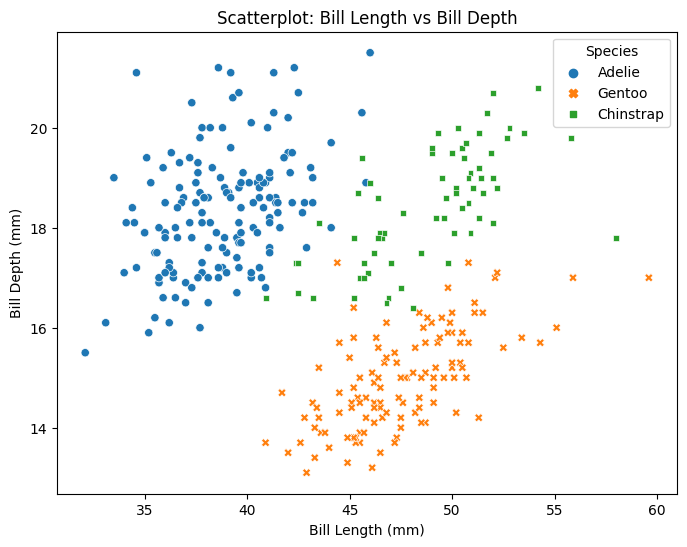

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.title("Scatterplot: Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Species")
plt.show()

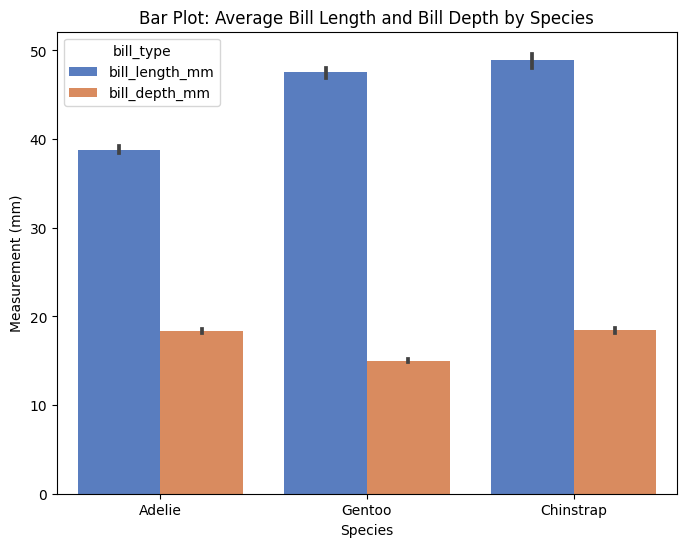

In [118]:
df_melted = df.melt(id_vars=['species'], value_vars=['bill_length_mm', 'bill_depth_mm'], var_name='bill_type', value_name='value')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x='species', y='value', hue='bill_type', palette='muted')
plt.title("Bar Plot: Average Bill Length and Bill Depth by Species")
plt.xlabel("Species")
plt.ylabel("Measurement (mm)")
plt.show()


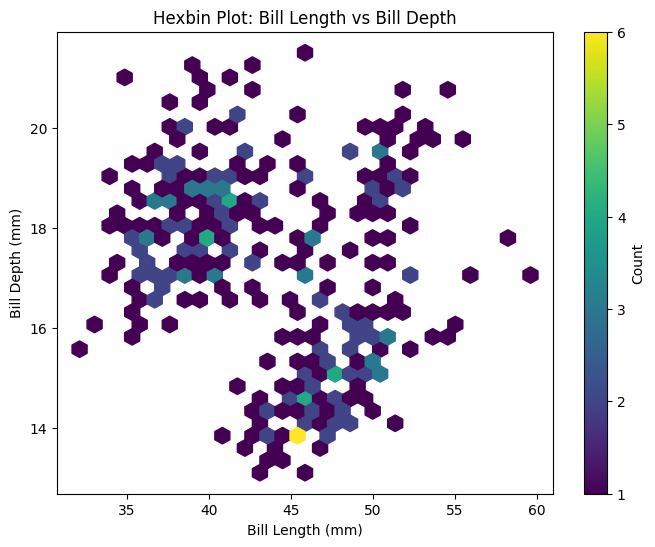

In [108]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["bill_length_mm"], df["bill_depth_mm"], gridsize=30, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Hexbin Plot: Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()


<Figure size 800x600 with 0 Axes>

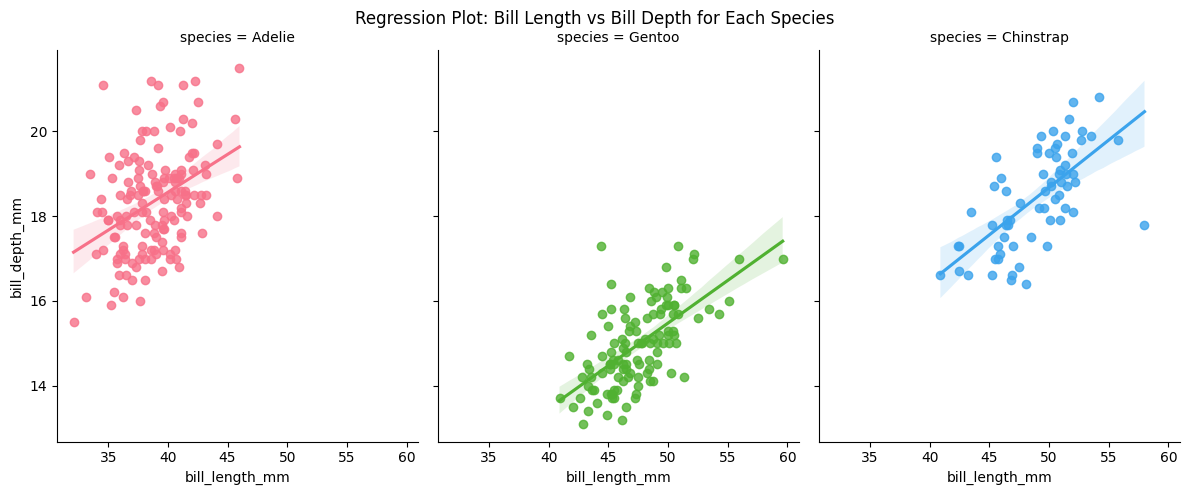

In [113]:
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", col="species", palette="husl", height=5, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle("Regression Plot: Bill Length vs Bill Depth for Each Species")
plt.show()


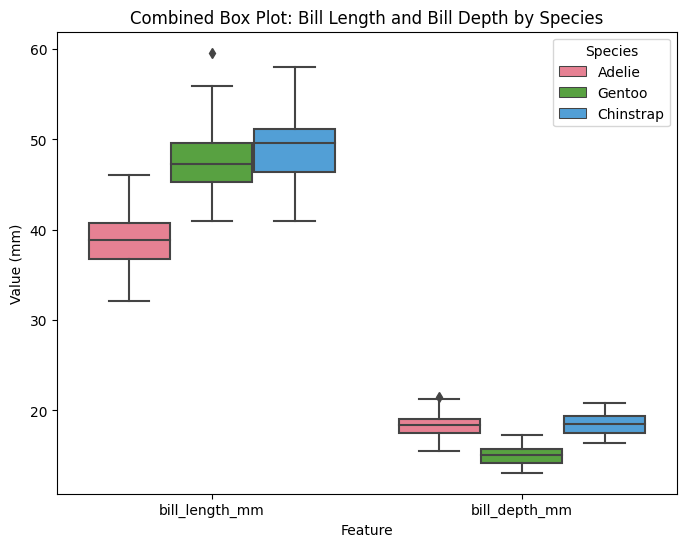

In [114]:
melted_df = df.melt(id_vars=["species"], value_vars=["bill_length_mm", "bill_depth_mm"], 
                    var_name="Feature", value_name="Value")

plt.figure(figsize=(8, 6))
sns.boxplot(data=melted_df, x="Feature", y="Value", hue="species", palette="husl")
plt.title("Combined Box Plot: Bill Length and Bill Depth by Species")
plt.xlabel("Feature")
plt.ylabel("Value (mm)")
plt.legend(title="Species")
plt.show()


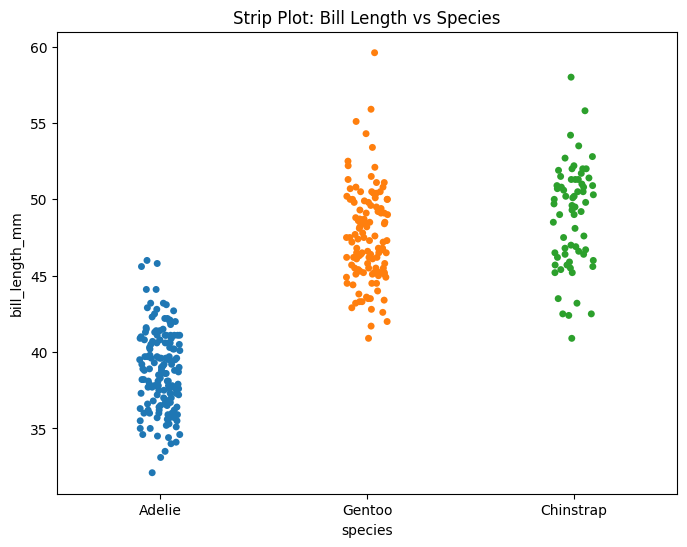

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip plot to visualize bill length vs species
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='species', y='bill_length_mm', jitter=True)
plt.title("Strip Plot: Bill Length vs Species")
plt.show()


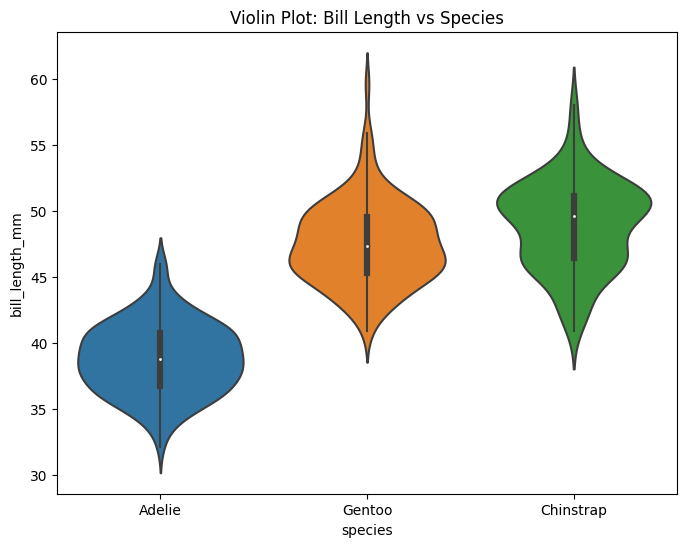

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot to visualize distribution of bill length vs bill depth by species
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='species', y='bill_length_mm')
plt.title("Violin Plot: Bill Length vs Species")
plt.show()


# Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [129]:
import pandas as pd

max_flipper_length = df.groupby(['island', 'species'])['flipper_length_mm'].max().reset_index()

print("Maximum flipper lengths for each combination of species and island:")
print(max_flipper_length)
longest_flippers_per_island = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]

print("\nSpecies with the longest flippers on each island:")
print(longest_flippers_per_island)


Maximum flipper lengths for each combination of species and island:
      island    species  flipper_length_mm
0     Biscoe     Adelie              203.0
1     Biscoe     Gentoo              231.0
2      Dream     Adelie              208.0
3      Dream  Chinstrap              212.0
4  Torgersen     Adelie              210.0

Species with the longest flippers on each island:
      island    species  flipper_length_mm
1     Biscoe     Gentoo              231.0
3      Dream  Chinstrap              212.0
4  Torgersen     Adelie              210.0


# Q8: Perform z-score normalization on this dataset. (code)

In [128]:
from scipy.stats import zscore

# Select numeric features for normalization
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a copy of the dataset to apply z-score normalization
normalized_df = df.copy()

# Apply z-score normalization to numeric features
for feature in numeric_features:
    normalized_df[feature] = zscore(df[feature])

print(normalized_df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen             NaN            NaN                NaN   
1  Adelie  Torgersen             NaN            NaN                NaN   
2  Adelie  Torgersen             NaN            NaN                NaN   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen             NaN            NaN                NaN   

   body_mass_g     sex  
0          NaN    male  
1          NaN  female  
2          NaN  female  
3          NaN     NaN  
4          NaN  female  
